# File to test gap_modules - simon 

## Importing modules and classes

In [1]:
# Using the model with the simplest descriptor, 2b - two body distance
from gap_models2 import GAPModel
from gap_models2 import distance_2b

hello world


## Creating instances of models and descriptors

In [2]:
# Initialize distance_2_b descriptor
descriptor_2b = distance_2b(4,'ard_se',0.5,1.0,'uniform','T',10)

 distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = uniform add_species = T n_sparse = 10


In [3]:
# Make instances of GAPModel
model = GAPModel()


## Training the model

In [4]:
# Getting the parameters
d2b_parameters = descriptor_2b.get_parameter_string()


# Choose training data
t_data = "/Users/simon/simon_ml/GAP/hydrogen_md.xyz"

# Train the model
model.train(d2b_parameters,training_data=t_data,GAP_potential='testGAP.xml')

# Print out file in which the potential is stored
model.get_potential_file()





 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = testGAP.xml at_file = '/Users/simon/simon_ml/GAP/hydrogen_md.xyz'  default_sigma = {0.008 0.04 0 0} gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = uniform add_species = T n_sparse = 10}
libAtoms::Hello World: 23/02/2021   21:13:23
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 76403777
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = /Users/simon/simon_ml/GAP/hydrogen_md.xyz
gap = " distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 t

'/Users/simon/simon_ml/GAP/testGAP.xml'

## Making predictions 

In [5]:
# Select which configuration you want to predict the energy for 
test_data = "/Users/simon/simon_ml/GAP/hydrogen_md.xyz"


# Get trained potential
GAP_potential = model.get_potential_file()


# Select filename in which predictions should be stored 
output = 'quip_prediction.xyz'


# Use predict method 
model.predict(Test_Data=test_data, GAP_potential=GAP_potential, QUIP_Prediction=output)



 quip E=T F=T  atoms_filename='/Users/simon/simon_ml/GAP/hydrogen_md.xyz'  param_filename='/Users/simon/simon_ml/GAP/testGAP.xml' | grep AT | sed 's/AT//'  > quip_prediction.xyz 



In [6]:
model.get_prediction_file()

'/Users/simon/simon_ml/GAP/quip_prediction.xyz'

## Plot real values against predicted values to see quality of the fit

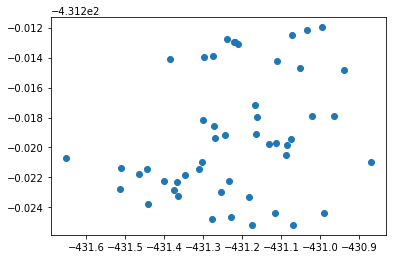

In [34]:
import ase.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Read data 
train_atoms = ase.io.read(t_data, ':')
test_atoms = ase.io.read(model.get_prediction_file(), ':')

# Plot real energies on the x axis and predicted energies on the y axis 
train_energy = [at.get_potential_energy()  for at in train_atoms]
predicted_energy = [at.get_potential_energy()  for at in test_atoms]

energy_plot = matplotlib.pyplot.scatter(train_energy[:-1],predicted_energy[:-1],)






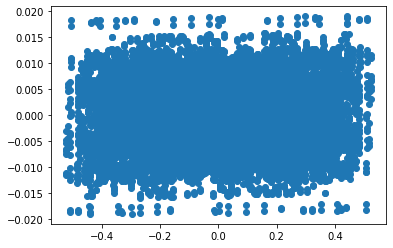

In [31]:
# Plot real forces on the x axis and predicted forces on the y axis 
train_atoms = ase.io.read(t_data, ':')
test_atoms = ase.io.read(model.get_prediction_file(), ':')

# extract data for only one species
train_force, test_force = [], []
for at_train, at_test in zip(train_atoms, test_atoms):
    # get the symbols
    sym_all = at_train.get_chemical_symbols()
    # add force for each atom
    for j, sym in enumerate(sym_all):
        train_force.append(at_train.get_forces()[j])
        #out_force.append(at_out.get_forces()[j]) \  
        test_force.append(at_test.arrays['force'][j])

force_plot = matplotlib.pyplot.scatter(train_force[:],test_force[:])
